In [ ]:
import numpy as np
import time
import math
import random
import glob
from scipy import linalg as LA
import pandas as pd
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import sampler
import torchvision.transforms as T

import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
float = np.vectorize(float)

def read_file(file_name):
    data = []
    with open(file_name, "r") as f:
        for line in f:
            item = line.strip().split(",")
            data.append(float(item))
    return data

In [ ]:
#I = glob.glob('/content/gdrive/My Drive/Deep Learning Project/20-dim data (41) representation sigma=0.3/*.csv', recursive=True)
#I = glob.glob('/content/gdrive/My Drive/Deep Learning Project/20-dim data (41) representation old distamce/*.csv', recursive=True)
#I = glob.glob('/content/gdrive/My Drive/Deep Learning Project/50-dim data (41) representation sigma=0.25/*.csv', recursive=True)
#I = glob.glob('/content/gdrive/My Drive/Deep Learning Project/50-dim data (41) representation sigma=1000/*.csv', recursive=True)
#I = glob.glob('/content/gdrive/My Drive/Deep Learning Project/50-dim data (41) representation old distamce/*.csv', recursive=True)
#I = glob.glob('/content/gdrive/My Drive/Deep Learning Project/250-dim data (41) representation sigma=1/*.csv', recursive=True)
I = glob.glob('/content/gdrive/My Drive/Deep Learning Project/250-dim data (41) representation old distamce/*.csv', recursive=True)


In [ ]:
r = len(I)
r

41

In [ ]:
data_embed = [0] * r

for i in range(r):
    data_embed[i] = [len(np.array(read_file(I[i]))), np.array(read_file(I[i]))]

data_embed = np.array(data_embed)
#data_embed = data_embed[data_embed[:,0].argsort()]

In [ ]:
X_train = [0] * r
X_test = [0] * r
y_train = [0] * r
y_test = [0] * r

for i in range(r):
    X_train[i], X_test[i], y_train[i], y_test[i] = train_test_split(np.array(data_embed[i][1]), 
                                                                np.ones(len(data_embed[i][1])), 
                                                                test_size=0.3, 
                                                                random_state=109)

In [ ]:
for i in range(r):
    X_train[i] = torch.tensor(X_train[i])
    X_test[i] = torch.tensor(X_test[i])
    y_train[i] = torch.tensor(y_train[i])
    y_test[i] = torch.tensor(y_test[i])

In [ ]:
X_train[0][0]

tensor([7.0227e+00, 6.4639e+00, 5.9184e+00, 5.3902e+00, 4.8850e+00, 4.4105e+00,
        3.9778e+00, 3.6020e+00, 3.3025e+00, 3.1017e+00, 3.0192e+00, 3.0646e+00,
        3.2326e+00, 3.5055e+00, 3.8611e+00, 4.2790e+00, 4.7426e+00, 6.7865e+00,
        6.2065e+00, 5.6361e+00, 5.0787e+00, 4.5388e+00, 4.0237e+00, 3.5441e+00,
        3.1165e+00, 2.7650e+00, 2.5217e+00, 2.4196e+00, 2.4760e+00, 2.6811e+00,
        3.0045e+00, 3.4127e+00, 3.8791e+00, 4.3848e+00, 6.5965e+00, 5.9982e+00,
        5.4059e+00, 4.8219e+00, 4.2496e+00, 3.6944e+00, 3.1653e+00, 2.6779e+00,
        2.2592e+00, 1.9539e+00, 1.8201e+00, 1.8945e+00, 2.1556e+00, 2.5467e+00,
        3.0173e+00, 3.5358e+00, 4.0842e+00, 6.4570e+00, 5.8444e+00, 5.2347e+00,
        4.6292e+00, 4.0296e+00, 3.4390e+00, 2.8631e+00, 2.3128e+00, 1.8117e+00,
        1.4129e+00, 1.2213e+00, 1.3296e+00, 1.6809e+00, 2.1592e+00, 2.6979e+00,
        3.2674e+00, 3.8542e+00, 6.3705e+00, 5.7489e+00, 5.1281e+00, 4.5085e+00,
        3.8904e+00, 3.2749e+00, 2.6637e+

In [ ]:
data_embed[:,0]

array([389, 275, 100, 108, 318, 167, 196, 150, 196, 394, 295, 160, 747,
       173, 148, 146, 144, 226, 678, 260, 423, 215, 182, 407, 133, 120,
       101, 112, 2124, 147, 207, 150, 113, 106, 544, 154, 382, 2014, 371,
       583, 800], dtype=object)

# 2-Layer Fully Connected Network

## 10-Class Classification

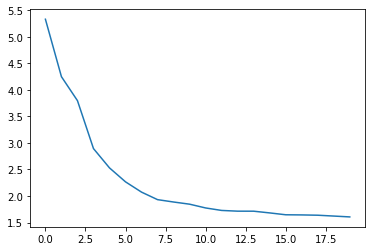

In [ ]:
Start_time = time.time()

mean_train_error = 0
mean_test_error = 0
var_test_error = 0


lr_decay = 0.9
num_trials = 1
learning_rate = 5e-3
Num_updates = 20
losses = torch.zeros(num_trials, r-1, Num_updates)

for s in range(num_trials):

    error_train_list_all = []
    error_test_list_all = []

    Start_time_2 = time.time()

    for i in range(r-9): 

        x = torch.cat((X_train[i], X_train[i+1], X_train[i+2], X_train[i+3], 
                       X_train[i+4],X_train[i+5], X_train[i+6], X_train[i+7],
                       X_train[i+8], X_train[i+9]), 0).float()
        y = torch.cat((0 * y_train[i], y_train[i+1], 2 * y_train[i+2], 3 * y_train[i+3],
                       4 * y_train[i+4], 5 * y_train[i+5], 6 * y_train[i+6], 7* y_train[i+7],
                       8 * y_train[i+8], 9 * y_train[i+9]), 0).long()

        D_in = len(x[0]) # D_in is input dimension
        H1 = 100 # H1 is first hidden dimension, 
        H2 = 20 # H2 is second hidden dimension, 
        D_out = 10 # D_out is output dimension

        model = torch.nn.Sequential(
                                    torch.nn.Linear(D_in, H1),
                                    torch.nn.LeakyReLU(0.01),
                                    #torch.nn.Tanh(),
                                    #torch.nn.ReLU(),
                                    #torch.nn.Dropout(p=q),
                                    torch.nn.Linear(H1, H2),
                                    torch.nn.LeakyReLU(0.01),
                                    #torch.nn.ReLU(),
                                    #torch.nn.Tanh(),
                                    #torch.nn.Dropout(p=q),
                                    torch.nn.Linear(H2, D_out)
                                    )

        loss_fn = torch.nn.CrossEntropyLoss()
        optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
        
        for t in range(Num_updates):
            y_pred = model(x) # of shape (N,D_out)
            loss = loss_fn(y_pred, y)
            losses[s, i, t] = loss

            #if i == 20:
             #   if t % 500 == 0:
              #      print(t, loss.item())
            
            if (t+1) % 200 == 0:
                optimizer.param_groups[0]['lr'] = lr_decay * learning_rate

            optimizer.zero_grad()

            loss.backward() # Backward pass

            optimizer.step()  # Calling the step function on the Optimizer 

        X = torch.cat((X_test[i], X_test[i+1], X_test[i+2], X_test[i+3], 
                       X_test[i+4],X_test[i+5], X_test[i+6], X_test[i+7],
                       X_test[i+8], X_test[i+9]), 0).float()
        Y = torch.cat((0 * y_test[i], y_test[i+1], 2 * y_test[i+2], 3 * y_test[i+3],
                       4 * y_test[i+4], 5 * y_test[i+5], 6 * y_test[i+6], 7* y_test[i+7],
                       8 * y_test[i+8], 9 * y_test[i+9]), 0).long()
        
        Y_pred = model(X)
        
        error_train_list_all.append((torch.argmax(y_pred, 1) != y).sum().float()/len(y))
        error_test_list_all.append((torch.argmax(Y_pred, 1) != Y).sum().float()/len(Y))

    mean_train_error += np.mean(error_train_list_all)
    mean_test_error += np.mean(error_test_list_all)
    var_test_error += np.var(error_test_list_all)

mean_train_error /= num_trials
mean_test_error /= num_trials
var_test_error /= num_trials

plt.plot((torch.mean(losses[0], dim=0)).detach().numpy())
plt.show()

### New Distance, $|Q|=250$, $\sigma=1$

In [ ]:
print('|Q|=250,', 'New Distance,', "sigma=1," "Number of Users: ", "41,", 
                                      'Number of Trials = ', num_trials)
print("Activation = LeakyReLU(0.01),", 'Learning Decay =', lr_decay, 
                                  ", Number of Updates = ", Num_updates)
Dic_1 = {}

models = ["Fully Connected 2-Layer"]

for k in range(len(models)): 
    Dic_1[k+1] = [models[k], H1, H2, None, learning_rate,  
                  np.round(mean_train_error, decimals = 4), 
                  np.round(mean_test_error, decimals = 4),
                  np.round(var_test_error, decimals = 4)]
    
df_1 = pd.DataFrame.from_dict(Dic_1, orient='index', 
                              columns=['Classifier', 'Hid_dim 1',
                                    'Hid_dim 2', 'Drop Out p', 'Learning Rate',  
                                    'Train Error', 'Test Error', 'Var_Error'])
df_1

|Q|=250, New Distance, sigma=1,Number of Users:  41, Number of Trials =  1
Activation = LeakyReLU(0.01), Learning Decay = 0.8 , Number of Updates =  200


,Classifier,Hid_dim 1,Hid_dim 2,Drop Out p,Learning Rate,Batch Normaln,Train Error,Test Error,Var_Error
1,Fully Connected 2-Layer,100,20,None,0.01,len(x),0.0458,0.5869,0.01


### Old Distance, $|Q|=250$

In [ ]:
print('|Q|=250,', 'Old Distance,', "Number of Users: ", "41,", 
                                      'Number of Trials = ', num_trials)
print("Activation = Tanh,", 'Learning Decay =', lr_decay, 
                                  ", Number of Updates = ", Num_updates)
Dic_1 = {}

models = ["Fully Connected 2-Layer"]

for k in range(len(models)): 
    Dic_1[k+1] = [models[k], H1, H2, None, learning_rate, 
                  np.round(mean_train_error, decimals = 4), 
                  np.round(mean_test_error, decimals = 4),
                  np.round(var_test_error, decimals = 4)]
    
df_1 = pd.DataFrame.from_dict(Dic_1, orient='index', 
                              columns=['Classifier', 'Hid_dim 1',
                                    'Hid_dim 2', 'Drop Out p', 'Learning Rate', 
                                    'Train Error', 'Test Error', 'Var_Error'])
df_1

|Q|=250, Old Distance, Number of Users:  41, Number of Trials =  1
Activation = Tanh, Learning Decay = 0.9 , Number of Updates =  1000


,Classifier,Hid_dim 1,Hid_dim 2,Drop Out p,Learning Rate,Train Error,Test Error,Var_Error
1,Fully Connected 2-Layer,100,20,None,0.001,0.5566,0.5659,0.0174


## Binary Classification

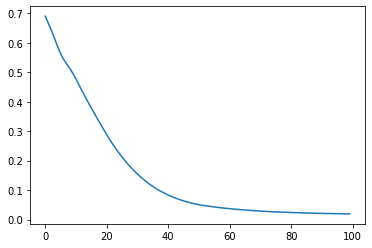

In [ ]:
Start_time = time.time()

mean_train_error = 0
mean_test_error = 0
var_test_error = 0

lr_decay = 0.7
num_trials = 1
Num_updates = 100
losses = torch.zeros(num_trials, r-1, Num_updates)
learning_rate = 0.01

for s in range(num_trials):
    
    X_train_labeled = [0] * r
    X_test_labeled = [0] * r
    error_train_list_all = []
    error_test_list_all = []

    Start_time_2 = time.time()

    for i in range(r-1): 
        j = i+1

        x = torch.cat((X_train[i], X_train[j]), 0).float()
        y = torch.cat((y_train[i], 
                       torch.zeros(y_train[j].size(), dtype=torch.double)), 0).long()

        N = len(x) # N is batch size
        D_in = len(x[0]) # D_in is input dimension
        H1 = 50 # H1 is the first hidden dimension
        H2 = 20 # H2 is the second hidden dimension 
        D_out = 2 # D_out is output dimension

        model = torch.nn.Sequential(
                                    torch.nn.Linear(D_in, H1),
                                    torch.nn.LeakyReLU(0.1),
                                    #torch.nn.Tanh(),
                                    #torch.nn.ReLU(),
                                    #torch.nn.Dropout(p=q),
                                    torch.nn.Linear(H1, H2),
                                    torch.nn.LeakyReLU(0.1),
                                    #torch.nn.Tanh(),
                                    #torch.nn.ReLU(),
                                    #torch.nn.Dropout(p=q),
                                    torch.nn.Linear(H2, D_out)
                                    )

        loss_fn = torch.nn.CrossEntropyLoss()
        optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
        
        for t in range(Num_updates):
            y_pred = model(x) # of shape (N,D_out)
            loss = loss_fn(y_pred, y)
            losses[s, i, t] = loss

            #if t % 499 == 498:
            #    print(t, loss.item())

            if (t+1) % 50 == 0:
                optimizer.param_groups[0]['lr'] = lr_decay * learning_rate

            optimizer.zero_grad()

            loss.backward() # Backward pass

            optimizer.step()  # Calling the step function on the Optimizer 

        X = torch.cat((X_test[i], X_test[j]), 0).float()
        Y = torch.cat((y_test[i], torch.zeros(y_test[j].size(), 
                                              dtype=torch.double)), 0).long()
        Y_pred = model(X)

        error_train_list_all.append(int(sum(abs(torch.argmax(y_pred, axis=1)-y)))/y.shape[0])
        error_test_list_all.append(int(sum(abs(torch.argmax(Y_pred, axis=1)-Y)))/Y.shape[0])

    mean_train_error += np.mean(error_train_list_all)
    mean_test_error += np.mean(error_test_list_all)
    var_test_error += np.var(error_test_list_all)

mean_train_error /= num_trials
mean_test_error /= num_trials
var_test_error /= num_trials

plt.plot((torch.mean(losses[0], dim=0)).detach().numpy())
plt.show()

### New Distance, $|Q|=250$, $\sigma=1$

In [ ]:
print('|Q|=250,', 'New Distance,', 'sigma = 1,', "Number of Users: ", "41,", 
      'Number of Trials = ', num_trials)
print("Activation Function: LeakyReLU(0.01)", "Number of Updates = ", Num_updates)
Dic_1 = {}

Dic_1[1] = ["FC 2-Layer", H1, H2, None, learning_rate, "len(x)", 
              np.round(mean_train_error, decimals = 4), 
              np.round(mean_test_error, decimals = 4),
              np.round(var_test_error, decimals = 4)]
    
df_1 = pd.DataFrame.from_dict(Dic_1, 
                              orient='index', 
                              columns=['Classifier', 'Hid_dim 1', 'Hid_dim 2', 
                                       'Drop Out p', 'Learning Rate',
                                       'Batch_Normaln', 'Train Error',
                                       'Test Error', 'Var_Error'])
df_1

|Q|=250, New Distance, sigma = 1, Number of Users:  41, Number of Trials =  1
Activation Function: LeakyReLU(0.01) Number of Updates =  800


,Classifier,Hid_dim 1,Hid_dim 2,Drop Out p,Learning Rate,Batch_Normaln,Train Error,Test Error,Var_Error
1,FC 2-Layer,100,20,None,0.0001,len(x),0.0625,0.2412,0.0089


### Old Distance, $|Q|=250$


In [ ]:
print('|Q|=250,', 'Old Distance,', "Number of Users: ", "41,", 
      'Number of Trials = ', num_trials)
print("Activation Function: LeakyReLU(0.01)", "Number of Updates = ", Num_updates)
Dic_1 = {}

Dic_1[1] = ["FC 2-Layer", H1, H2, None, learning_rate, "len(x)", 
              np.round(mean_train_error, decimals = 4), 
              np.round(mean_test_error, decimals = 4),
              np.round(var_test_error, decimals = 4)]
    
df_1 = pd.DataFrame.from_dict(Dic_1, 
                              orient='index', 
                              columns=['Classifier', 'Hid_dim 1', 'Hid_dim 2', 
                                       'Drop Out p', 'Learning Rate',
                                       'Batch_Normaln', 'Train Error',
                                       'Test Error', 'Var_Error'])
df_1

|Q|=250, Old Distance, Number of Users:  41, Number of Trials =  1
Activation Function: LeakyReLU(0.01) Number of Updates =  10000


,Classifier,Hid_dim 1,Hid_dim 2,Drop Out p,Learning Rate,Batch_Normaln,Train Error,Test Error,Var_Error
1,FC 2-Layer,100,20,None,0.0008,len(x),0.1202,0.1449,0.0171
